In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [18]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plot_vmaf(vmafs, vmin, vmax):
    x = [x for x in range(len(vmafs))]
    mean = round(sum(vmafs) / len(vmafs), 3)
    perc_1 = round(np.percentile(vmafs, 1), 3)
    perc_25 = round(np.percentile(vmafs, 25), 3)
    perc_75 = round(np.percentile(vmafs, 75), 3)
    
    yhat = smooth(vmafs, 120) # window size 51, polynomial order 3
    
    # Plot
    plt.figure(figsize=(15, 4))
    [plt.axhline(i, color='grey', linewidth=0.4) for i in range(0, 100)]
    [plt.axhline(i, color='black', linewidth=0.6) for i in range(0, 100, 5)]
    plt.plot(x, yhat, label=f'Frames: {len(vmafs)} Mean:{mean}\n'
                                f'1%: {perc_1}  25%: {perc_25}  75%: {perc_75}', linewidth=1.4)
    plt.ylabel('VMAF')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)
    plt.ylim(vmin, vmax)
    plt.tight_layout()
    plt.margins(0)
    plt.show()


In [19]:
def read_vmafs_from_json(jfile):
    with open(jfile) as f:
      data = json.load(f)
    
    frame_lst = [frm['metrics'] for frm in data['frames']]
    vmafs = [frm['vmaf'] for frm in frame_lst]
    return vmafs

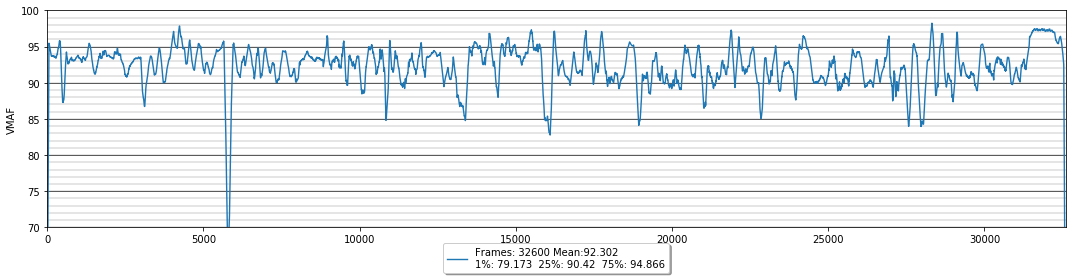

In [20]:
default_vmafs = read_vmafs_from_json('/mnt/L4/media/av1ancrf/test/s2_40.json')
plot_vmaf(default_vmafs, 70, 100)

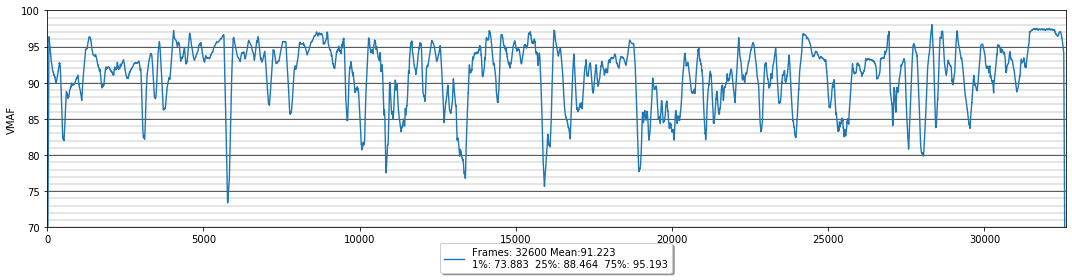

In [21]:
nnvmaf_vmafs = read_vmafs_from_json('/mnt/L4/media/av1ancrf/test/s2_40_nnvmaf84.json')
plot_vmaf(nnvmaf_vmafs, 70, 100)

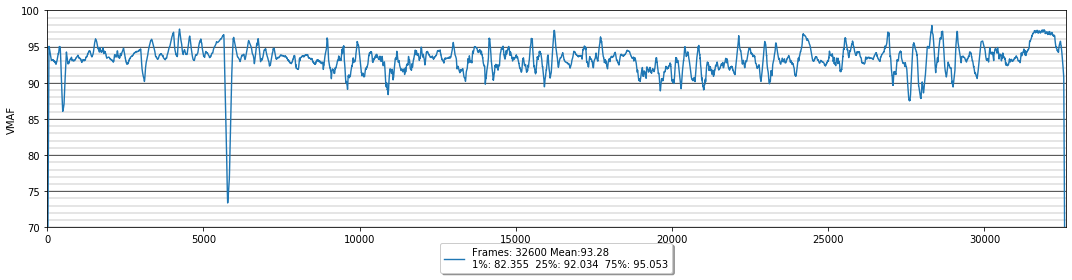

In [22]:
targetvmaf_vmafs = read_vmafs_from_json('/mnt/L4/media/av1ancrf/test/s2_40_vmaf92.json')
plot_vmaf(targetvmaf_vmafs, 70, 100)